In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import numpy as np

In [2]:
seeds = pd.read_csv('seeds_dataset.txt', 
                    sep='\t', 
                    names=['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coeff', 'length_groove', 'label']
                   )

In [3]:
seeds.tail()

area  perimeter  compactness  length  width  asymmetry_coeff  \
205  12.19      13.20       0.8783   5.137  2.981            3.631   
206  11.23      12.88       0.8511   5.140  2.795            4.325   
207  13.20      13.66       0.8883   5.236  3.232            8.315   
208  11.84      13.21       0.8521   5.175  2.836            3.598   
209  12.30      13.34       0.8684   5.243  2.974            5.637   

     length_groove  label  
205          4.870      3  
206          5.003      3  
207          5.056      3  
208          5.044      3  
209          5.063      3

In [4]:
seeds.dtypes

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
length_groove      float64
label                int64
dtype: object

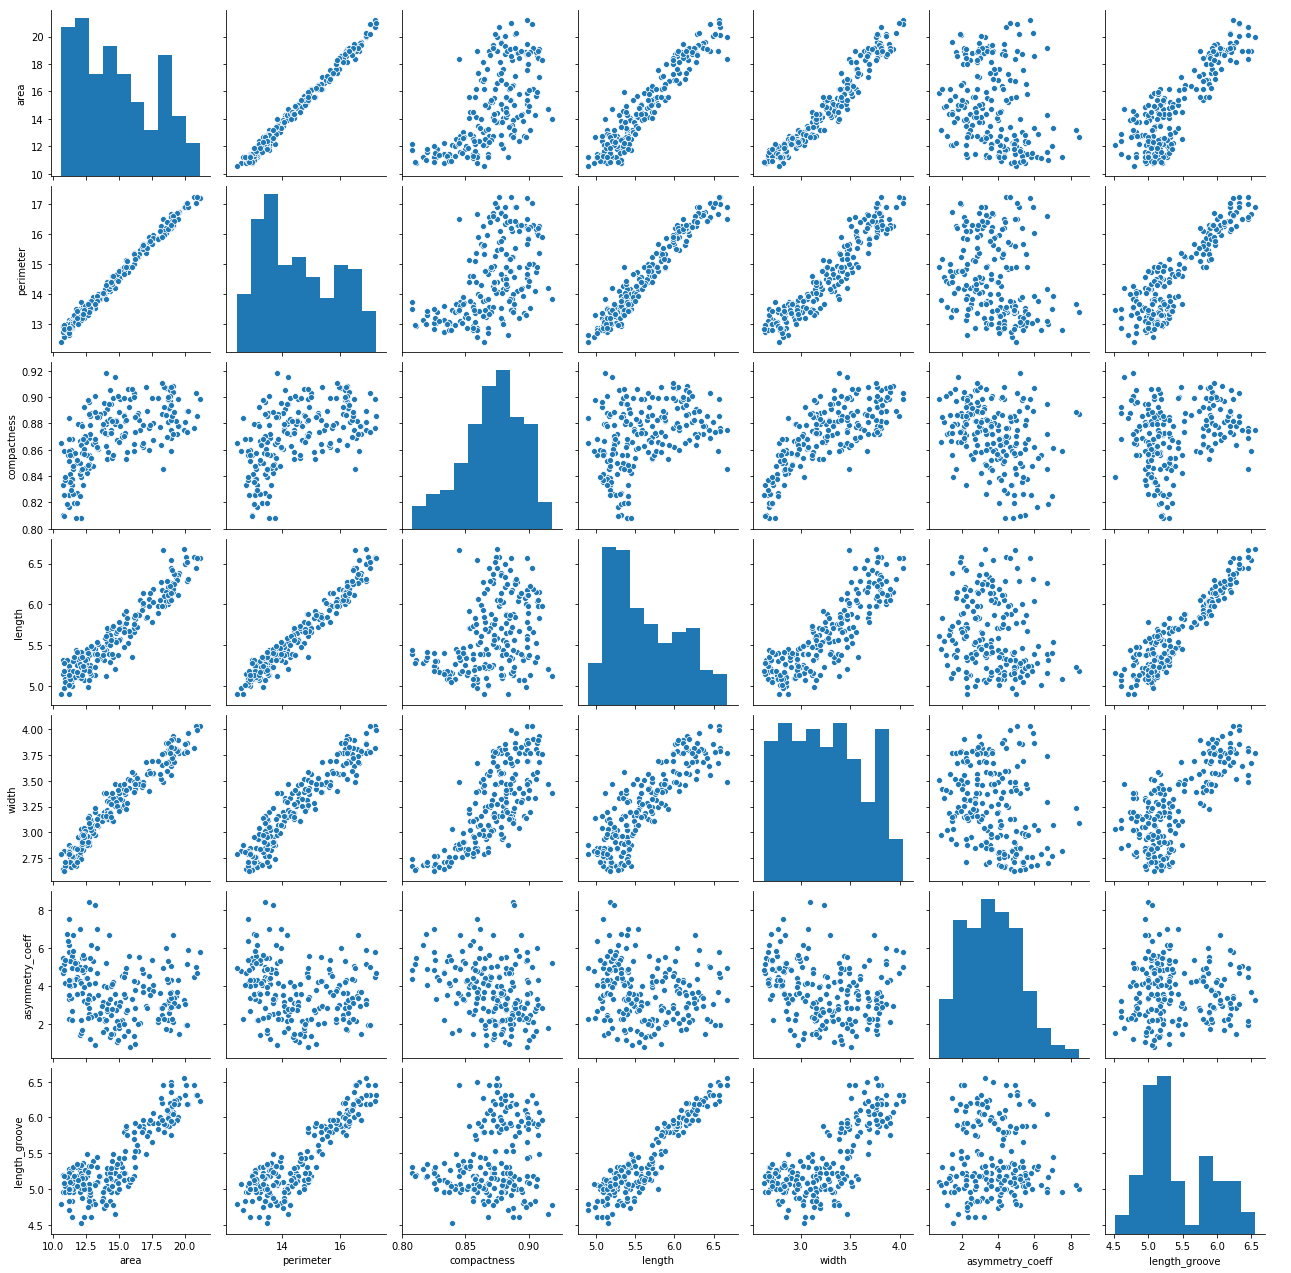

In [5]:
sns.pairplot(seeds[seeds.columns[:-1]])

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(seeds[seeds.columns[:-1]])

In [23]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [24]:
kmeans.cluster_centers_

array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

In [25]:
metrics.silhouette_score(seeds, kmeans.labels_, metric='euclidean')

0.4836541528611453

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5182873410849096
For n_clusters = 3 The average silhouette_score is : 0.47193373191268845
For n_clusters = 4 The average silhouette_score is : 0.3953600261389667
For n_clusters = 5 The average silhouette_score is : 0.360170558962535
For n_clusters = 6 The average silhouette_score is : 0.3665645053867338


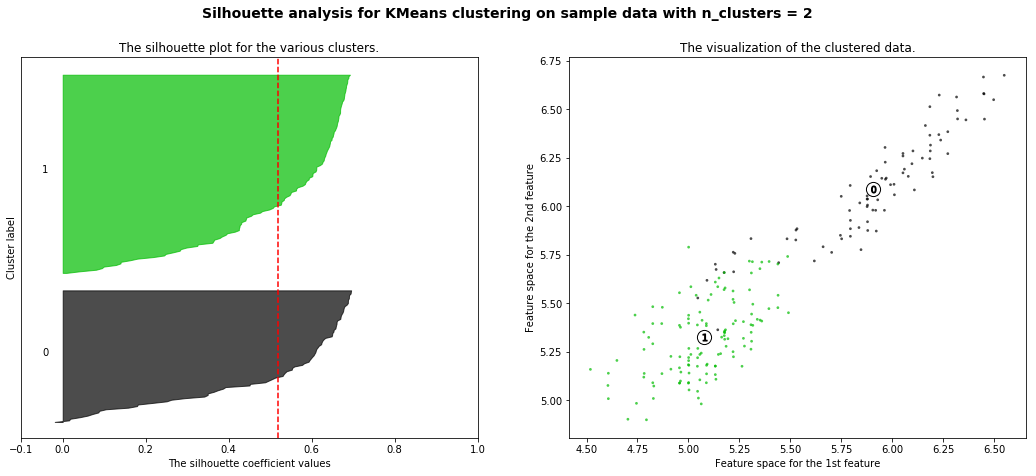

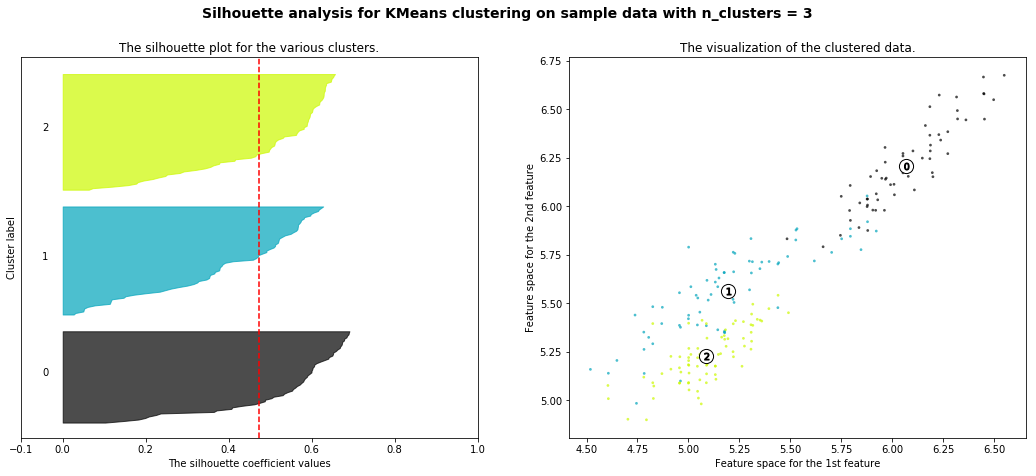

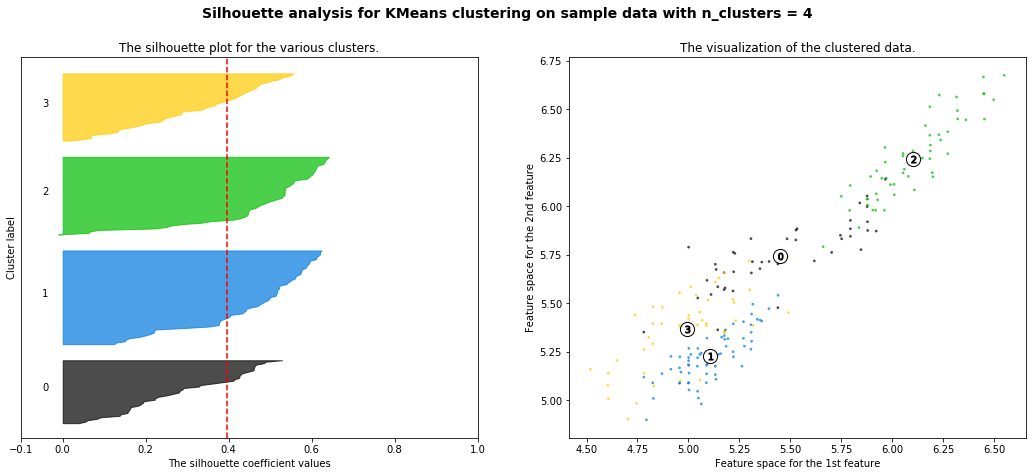

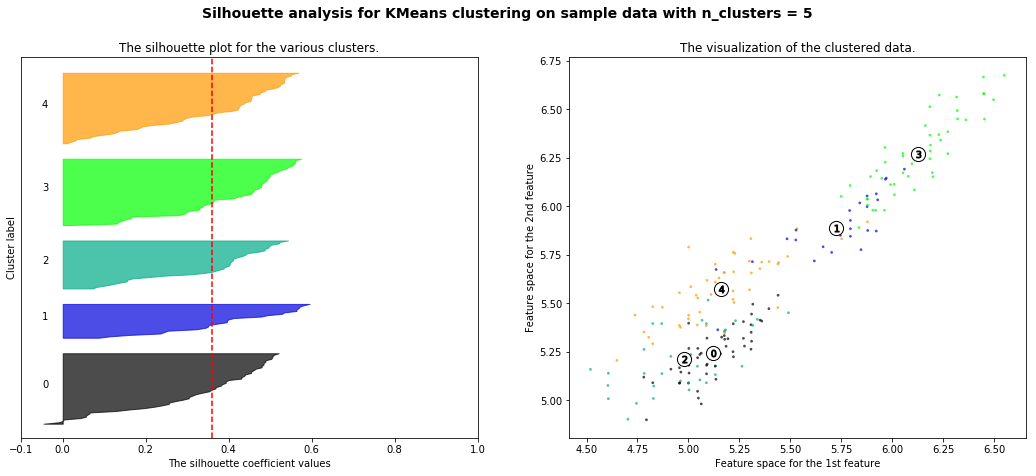

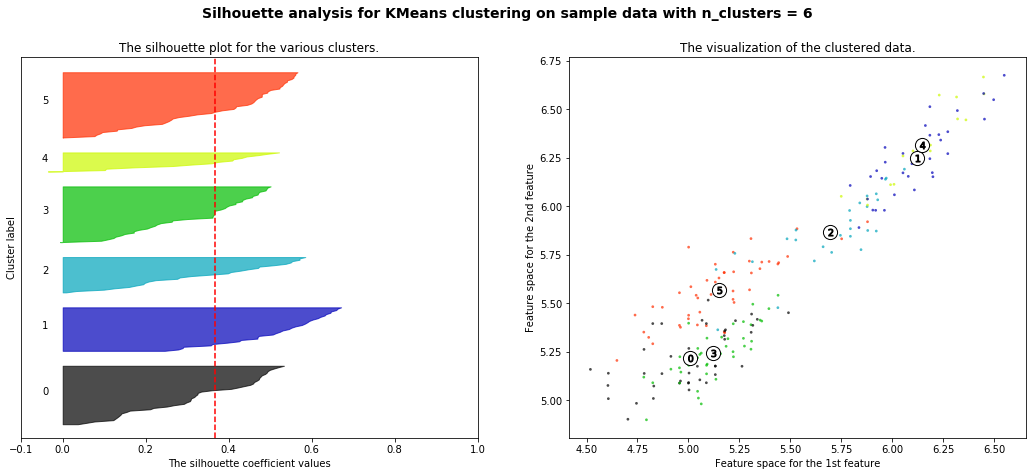

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

X = np.array(seeds[seeds.columns[:-1]])
y = np.array(seeds.label)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 6], X[:, 3], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 6], centers[:, 3], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[3], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

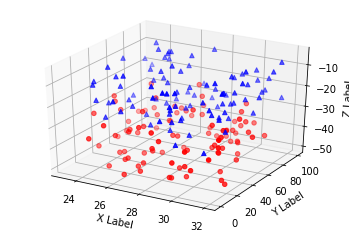

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

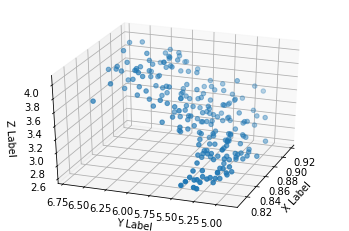

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', azim=200, elev=30)

n = 100

## For each set of style and range settings, plot n random points in the box
## defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#    xs = randrange(n, 23, 32)
#    ys = randrange(n, 0, 100)
#    zs = randrange(n, zlow, zhigh)
#    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(X[:, 2], X[:, 3], X[:, 4])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [99]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure(figsize=(16, 16/3*119))
# ax = fig.add_subplot(141, projection='3d', azim=200, elev=30)
# 
# ax.scatter(X[:, 2], X[:, 3], X[:, 4])
# 
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

n = 1

for i in range(6):
    for j in range(6):
        ax = fig.add_subplot(119, 3, n, projection='3d')
        n += 1

        ax.scatter(X[:, i], X[:, j], X[:, 0])

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

plt.show()

MemoryError: In RendererAgg: Out of memory

<Figure size 1152x45696 with 36 Axes>

In [7]:
X = np.array(seeds[seeds.columns[:-1]])
y = np.array(seeds.label)

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

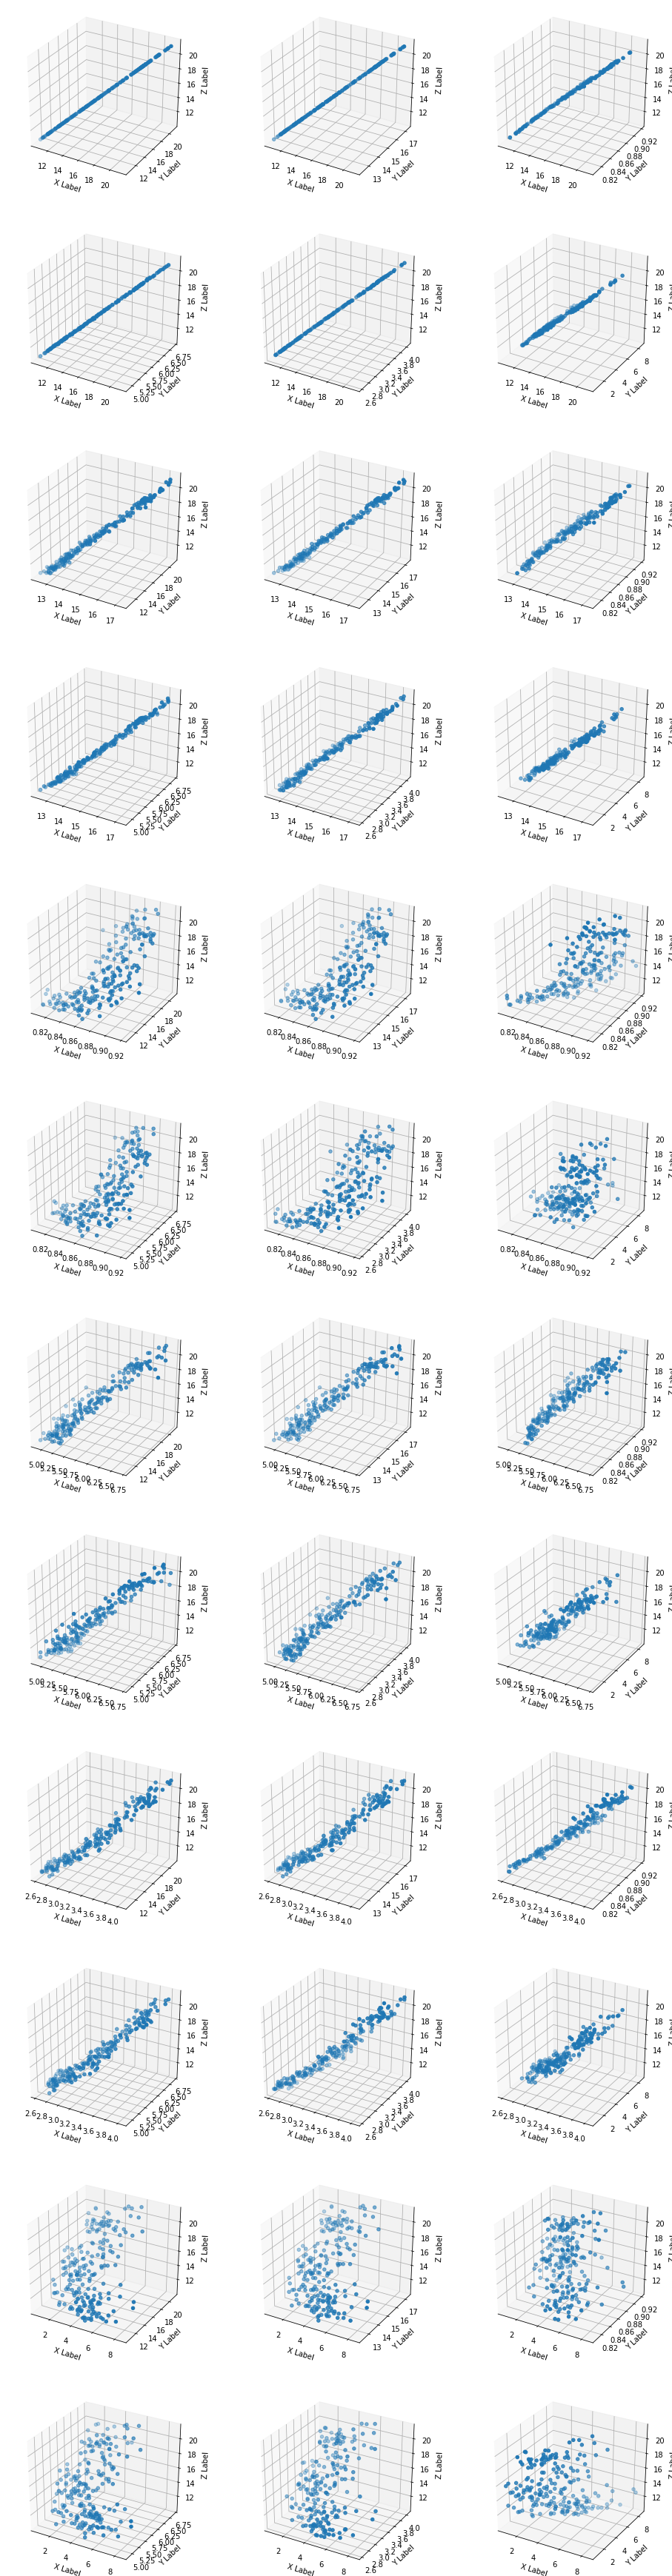

In [9]:
fig = plt.figure(figsize=(16, 16/3*17))

n = 1

for i in range(6):
    for j in range(6):
        ax = fig.add_subplot(17, 3, n, projection='3d')
        n += 1

        ax.scatter(X[:, i], X[:, j], X[:, 0])

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

plt.show()

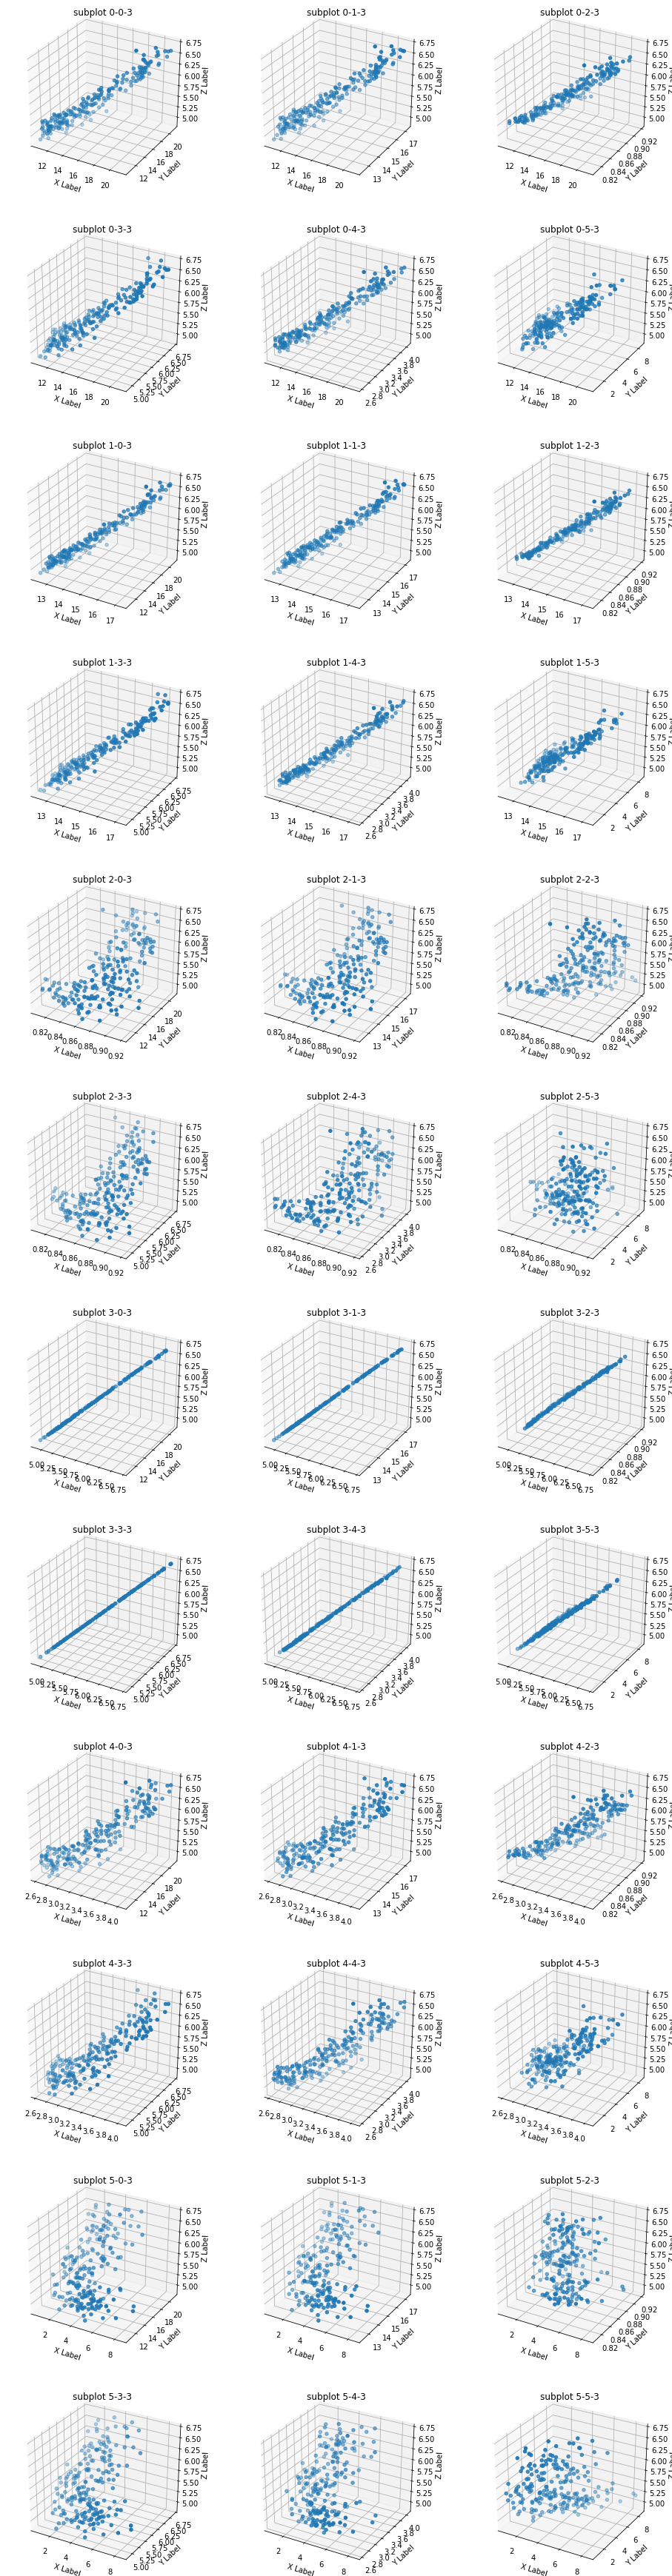

In [13]:
fig = plt.figure(figsize=(16, 16/3*17))

n = 1

for i in range(6):
    for j in range(6):
        ax = fig.add_subplot(17, 3, n, projection='3d')
        n += 1

        ax.scatter(X[:, i], X[:, j], X[:, 3])

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title('subplot {}-{}-{}'.format(i, j, 3))

plt.show()

In [21]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_new = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.8293852  0.16363245 0.00565791]
[47.49531899 21.09635322  3.92284041]


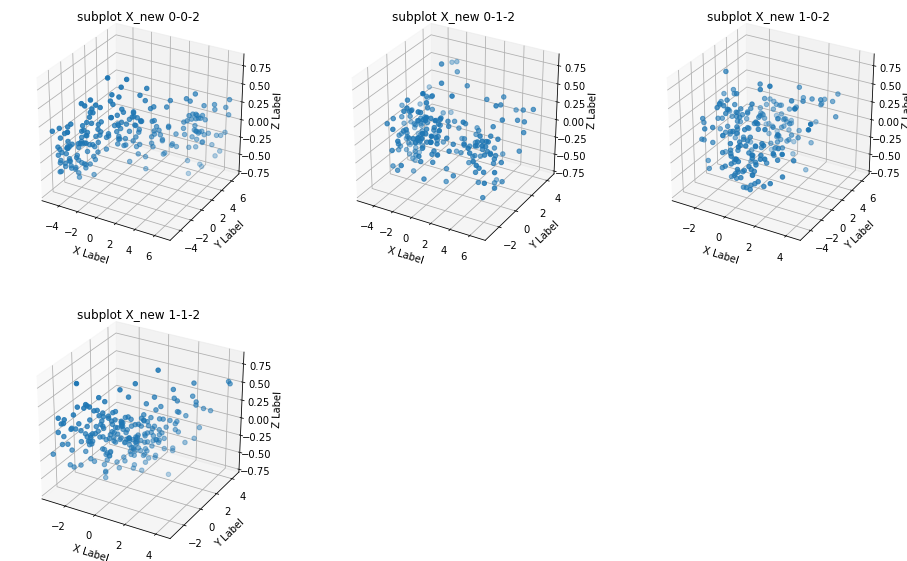

In [24]:
fig = plt.figure(figsize=(16, 16/3*6))

n = 1
z = 2

for i in range(2):
    for j in range(2):
        ax = fig.add_subplot(6, 3, n, projection='3d')
        n += 1

        ax.scatter(X_new[:, i], X_new[:, j], X_new[:, z])

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title('subplot X_new {}-{}-{}'.format(i, j, z))

plt.show()

In [25]:
kmeans_new = KMeans(n_clusters=3, random_state=0).fit(X_new)

In [26]:
kmeans_new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [30]:
a = np.array(X_new)

In [37]:
b = np.c_[a, kmeans_new.labels_]

In [40]:
b[b[:,-1] == 0][:, 0]

array([ 0.66344838,  0.31566651, -0.6604993 , -1.0552759 ,  1.61999921,
       -0.47693801, -0.18483472, -0.78062962,  2.2821081 ,  1.97854147,
        0.36912295, -0.7110212 , -1.21370535, -1.16908541, -1.19272176,
       -0.50817121,  1.05726438, -0.1509611 , -0.6313321 , -0.68969866,
        1.40769072, -2.84267672,  0.43326822,  1.81289158, -2.19571862,
       -0.74446884, -1.5035048 , -1.5207532 ,  0.76119026, -0.76773843,
       -0.82396593,  0.4395424 ,  1.52205298,  1.65240525,  0.01157507,
       -1.3716017 , -1.36349513, -1.88302954,  0.62956057,  0.28441212,
       -0.96004475,  0.81896462,  0.1966213 ,  0.01532761,  0.25423517,
       -0.50538453,  0.71197309, -0.35582938, -0.56685633,  0.01809689,
        0.47842486, -0.37546464,  0.28388332,  0.76942973, -2.77110124,
       -2.0508933 , -2.16820614, -0.2596738 , -0.70708443, -0.23711422,
        1.65697361,  1.48852809,  1.15533338,  0.5921148 ,  1.48591457,
        0.69066009,  0.53099358,  1.10275966,  1.08106342,  1.58

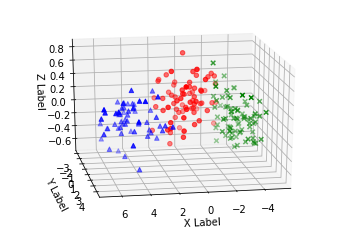

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', azim=80, elev=20)

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = b[b[:,-1] == l][:, 0]
    ys = b[b[:,-1] == l][:, 1]
    zs = b[b[:,-1] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [62]:
d = np.c_[X, kmeans_new.labels_]

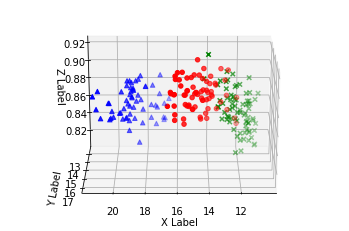

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', azim=90, elev=20)

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = d[d[:,-1] == l][:, 0]
    ys = d[d[:,-1] == l][:, 1]
    zs = d[d[:,-1] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

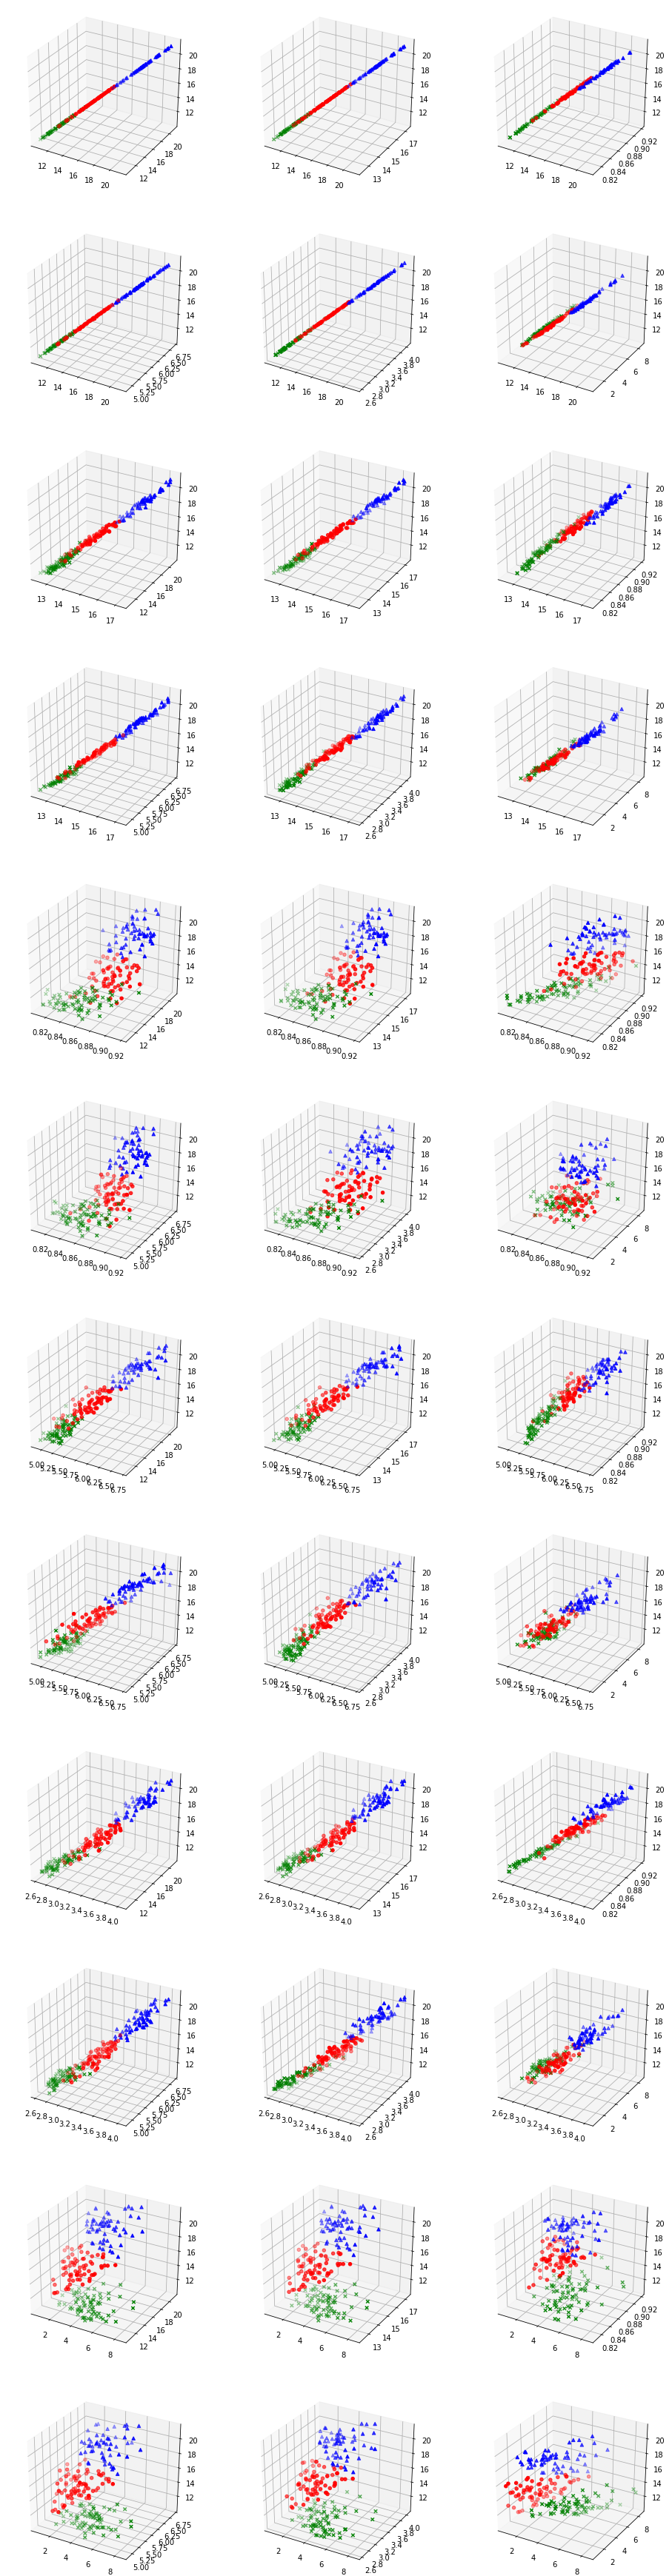

In [67]:
fig = plt.figure(figsize=(16, 16/3*17))

n = 1

for i in range(6):
    for j in range(6):
        ax = fig.add_subplot(17, 3, n, projection='3d')
        n += 1

        for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
            xs = d[d[:,-1] == l][:, i]
            ys = d[d[:,-1] == l][:, j]
            zs = d[d[:,-1] == l][:, 0]
            ax.scatter(xs, ys, zs, c=c, marker=m)

plt.show()

In [ ]:
# df = indices[['number', 'Davies-Bouldin', 'Silhouette', 'Dunn']].melt('number', var_name='cols',  value_name='vals')
# g = sns.catplot(x="number", y="vals", hue='cols', data=df, kind='point')

In [ ]:
from sklearn.manifold import TSNE
X = np.array(seeds[seeds.columns[:-1]])
X_embedded = TSNE(n_components=3).fit_transform(X)
X_embedded.shape


d = np.c_[X_embedded, kmeans.labels_]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', azim=180, elev=30)

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = d[d[:,-1] == l][:, 0]
    ys = d[d[:,-1] == l][:, 1]
    zs = d[d[:,-1] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()